In [68]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

BLACK = 0
MEDIUM_GRAY = 127
WHITE = 255

MAX = 256

def readImage(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def getLocalTime() -> str:
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)


def showImage(image, cmap = 'gray') -> None:
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)

def plothist(hist, color) -> None:
    ax = plt.subplots()[1]
    ax.plot(hist, color)


def showImages(images, cmap = 'gray') -> None:
    _, axs = plt.subplots(nrows=1, ncols=len(images))

    for i in range(len(images)):
        axs[i].imshow(images[i], cmap = cmap, vmin = BLACK, vmax = WHITE)

    plt.tight_layout()

def showImageList(lista, cmap = 'viridis'):
    for item in lista:
        showImage(item, cmap)

def saveImage(image, filename = 'result', cmap = 'gray', mode = 'sync') -> None:    
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches = 0)

    if mode == 'sync':
        plt.show()

def plotHistograma(image, max = 256):        
    plt.xlabel('Tom de cinza')
    plt.ylabel('Probabilidade')

    plt.bar(range(max), image)
    plt.show()

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


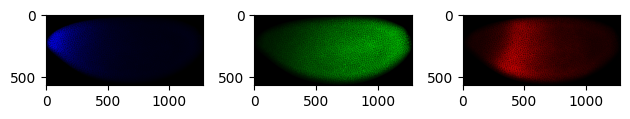

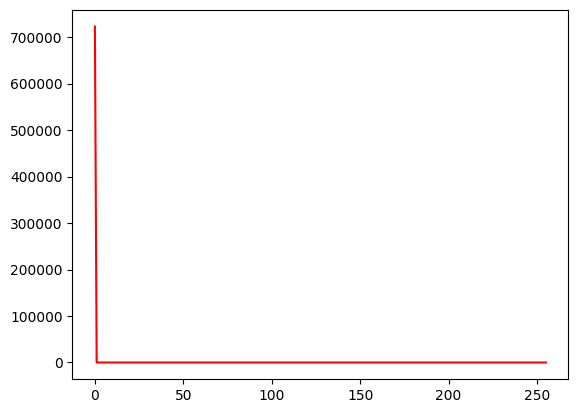

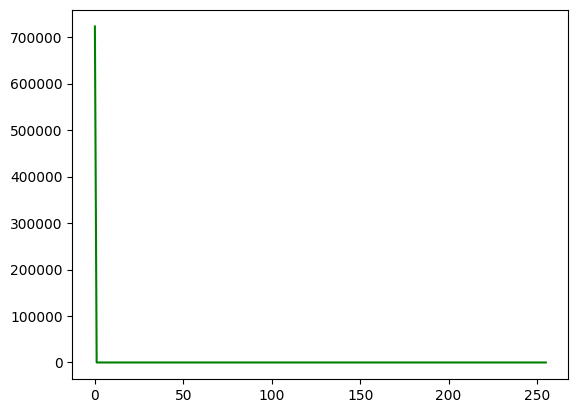

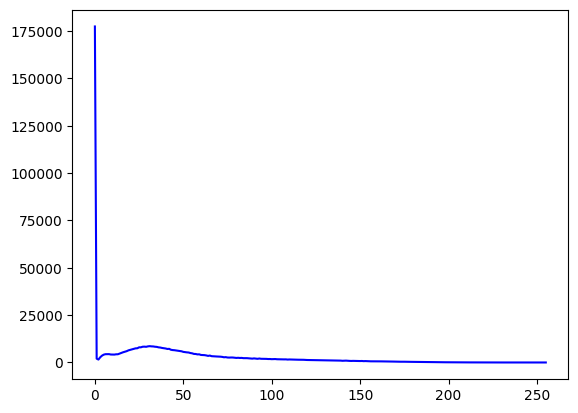

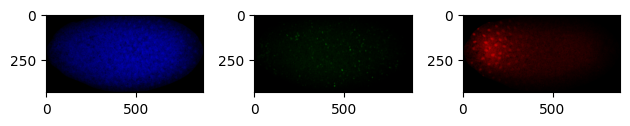

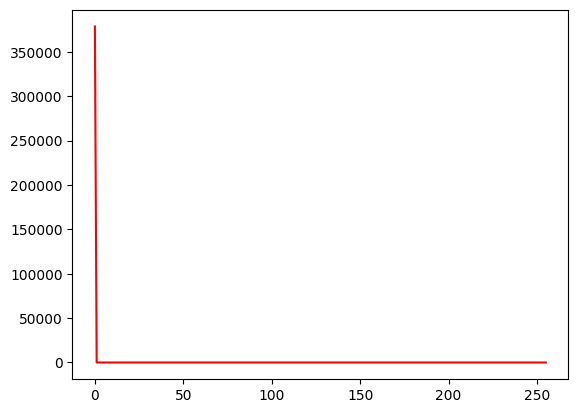

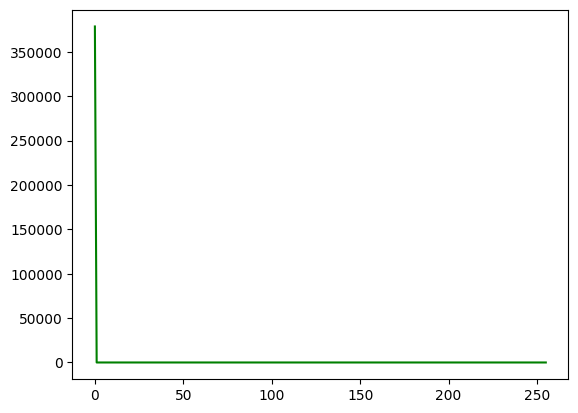

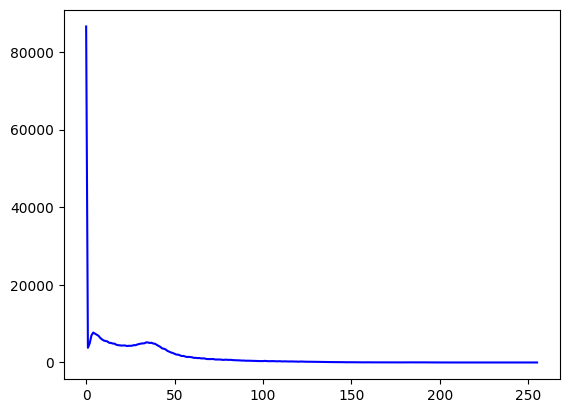

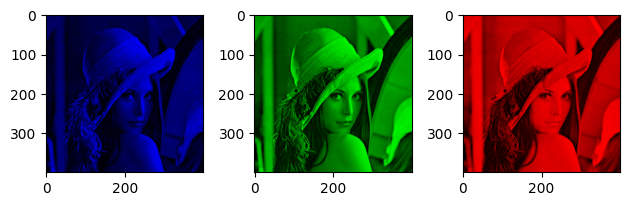

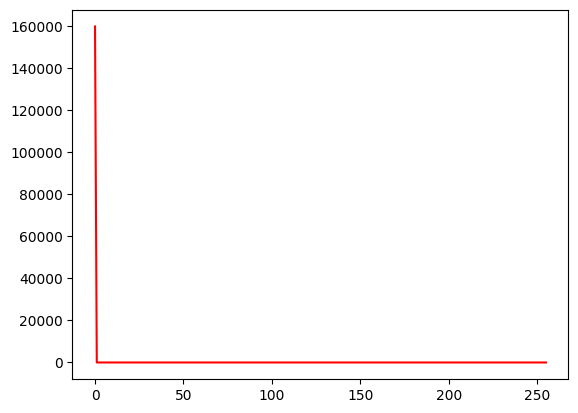

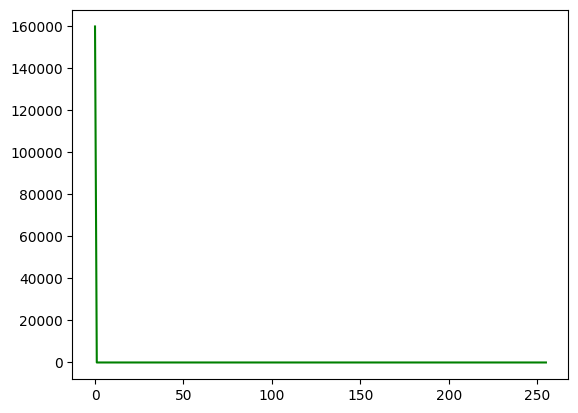

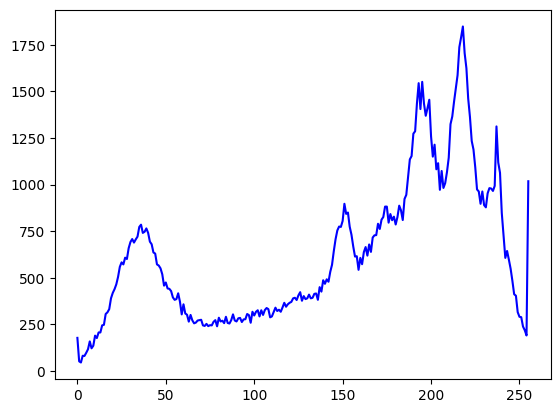

In [70]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
img1RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1HSV = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

img2 = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
img2RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2HSV = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)
img3RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3HSV = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

# def getHSVChannels(image):
#     (H, S, V) = cv2.split(image)
#     zeros = np.zeros(image.shape[:2], dtype="uint8")

#     ch1 = cv2.merge([zeros, zeros, R])
#     ch2 = cv2.merge([zeros, G, zeros])
#     ch3 = cv2.merge([B, zeros, zeros])
    
#     return ( ch1, ch2, ch3 )

# def plotHSVChannelsHist(image):
#     (H, S, V) = cv2.split(image)
#     zeros = np.zeros(image.shape[:2], dtype="uint8")
    
#     hist1 = cv2.calcHist([cv2.merge([zeros, zeros, R])], [0], None, [256], [0,256])
#     hist2 = cv2.calcHist([cv2.merge([zeros, G, zeros])], [0], None, [256], [0,256])
#     hist3 = cv2.calcHist([cv2.merge([B, zeros, zeros])], [0], None, [256], [0,256])
    
#     plothist(hist1, color = 'r')
#     plothist(hist2, color = 'g')
#     plothist(hist3, color = 'b')

def getRGBChannels(image):
    (B, G, R) = cv2.split(image)
    zeros = np.zeros(image.shape[:2], dtype="uint8")

    ch1 = cv2.merge([zeros, zeros, R])
    ch2 = cv2.merge([zeros, G, zeros])
    ch3 = cv2.merge([B, zeros, zeros])
    
    return ( ch1, ch2, ch3 )

def plotRGBChannelsHist(image):
    channels = getRGBChannels(image)
    
    hist1 = cv2.calcHist([channels[0]], [0], None, [256], [0,256])
    hist2 = cv2.calcHist([channels[1]], [0], None, [256], [0,256])
    hist3 = cv2.calcHist([channels[2]], [0], None, [256], [0,256])
    
    plothist(hist1, color = 'r')
    plothist(hist2, color = 'g')
    plothist(hist3, color = 'b')
    
    
# showImageList(getRGBChannels(img1RGB))
# showImageList(getRGBChannels(img2RGB))
# showImageList(getRGBChannels(img3RGB))

showImages(getRGBChannels(img1RGB), 'viridis')
plotRGBChannelsHist(img1RGB)

showImages(getRGBChannels(img2RGB), 'viridis')
plotRGBChannelsHist(img2RGB)

showImages(getRGBChannels(img3RGB), 'viridis')
plotRGBChannelsHist(img3RGB)




2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

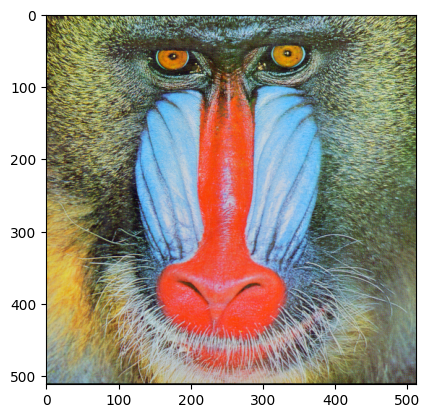

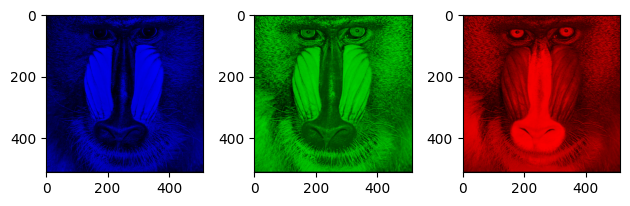

In [71]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
img_mand_RGB = cv2.cvtColor(img_mand, cv2.COLOR_BGR2RGB)
plt.imshow(img_mand_RGB);

showImages(showRGBChannels(img_mand_RGB), 'viridis')


3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

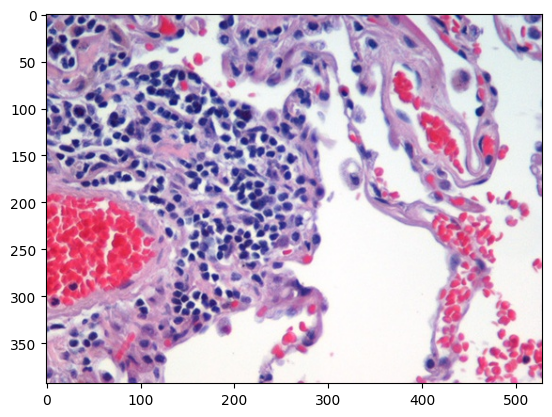

In [15]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)
img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
plt.imshow(img_he_RGB);